In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import dlib

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path  = '/content/drive/MyDrive/Colab DL docs/Image Dataset/images'

In [ ]:
os.listdir(path)

['4', '7', '5', '2', '1', '9', '8', '3', '10', '6', '0']

In [ ]:
os.listdir(os.path.join(path,os.listdir(path)[0]))[0]

'image_0403.jpg'

In [ ]:
os.listdir(os.path.join(path,os.listdir(path)[0]))[0]

'image_0403.jpg'

In [ ]:
os.listdir(os.path.join(os.path.join(path,os.listdir(path)[0])))[0]

'image_0403.jpg'

In [ ]:
path1 = os.path.join(os.path.join(os.path.join(path,os.listdir(path)[0])),os.listdir(os.path.join(os.path.join(path,os.listdir(path)[0])))[0])

In [ ]:
cv2.imread(path1)

array([[[161, 169, 162],
        [164, 172, 165],
        [164, 173, 163],
        ...,
        [172, 177, 168],
        [171, 176, 167],
        [177, 185, 175]],

       [[156, 164, 157],
        [160, 169, 159],
        [162, 171, 161],
        ...,
        [172, 177, 168],
        [173, 178, 169],
        [180, 188, 178]],

       [[155, 164, 154],
        [160, 169, 159],
        [163, 172, 162],
        ...,
        [171, 176, 167],
        [175, 180, 171],
        [185, 193, 183]],

       ...,

       [[147, 151, 139],
        [148, 152, 140],
        [148, 152, 141],
        ...,
        [179, 189, 189],
        [176, 186, 186],
        [178, 188, 188]],

       [[144, 150, 139],
        [148, 154, 143],
        [147, 152, 143],
        ...,
        [177, 187, 187],
        [176, 184, 184],
        [182, 190, 190]],

       [[141, 149, 138],
        [149, 157, 146],
        [148, 153, 144],
        ...,
        [175, 185, 185],
        [177, 185, 185],
        [187, 195, 195]]

In [ ]:
path2 = []
for i in os.listdir(path):
  for j in os.listdir(os.path.join(path,i)):
    path2.append(os.path.join(os.path.join(path,i),j))
    #print(path2)

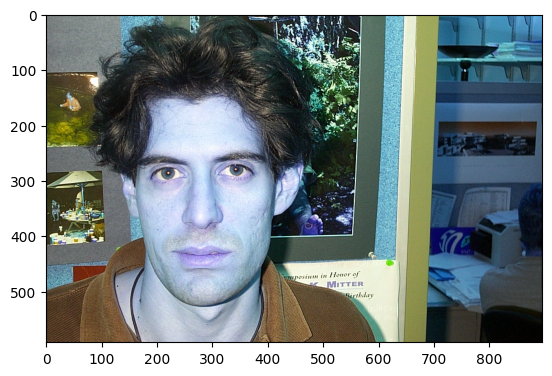

In [ ]:
plt.imshow(cv2.imread(path2[24]))

In [ ]:
new_images = []
for i in range(len(path2)):
  q1 = cv2.imread(path2[i])
  new_images.append(q1)

In [ ]:
new_images

[array([[[161, 169, 162],
         [164, 172, 165],
         [164, 173, 163],
         ...,
         [172, 177, 168],
         [171, 176, 167],
         [177, 185, 175]],
 
        [[156, 164, 157],
         [160, 169, 159],
         [162, 171, 161],
         ...,
         [172, 177, 168],
         [173, 178, 169],
         [180, 188, 178]],
 
        [[155, 164, 154],
         [160, 169, 159],
         [163, 172, 162],
         ...,
         [171, 176, 167],
         [175, 180, 171],
         [185, 193, 183]],
 
        ...,
 
        [[147, 151, 139],
         [148, 152, 140],
         [148, 152, 141],
         ...,
         [179, 189, 189],
         [176, 186, 186],
         [178, 188, 188]],
 
        [[144, 150, 139],
         [148, 154, 143],
         [147, 152, 143],
         ...,
         [177, 187, 187],
         [176, 184, 184],
         [182, 190, 190]],
 
        [[141, 149, 138],
         [149, 157, 146],
         [148, 153, 144],
         ...,
         [175, 185, 185],
  

In [ ]:
def image_recog(new_images):
  new_images1=[]
  hog_face_detector = dlib.get_frontal_face_detector()
  for image in new_images:
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    result = hog_face_detector(image)
    for bbox in result:
      left =   bbox.left()
      right =  bbox.right()
      top =    bbox.top()
      bottom = bbox.bottom()

    imaze = cv2.rectangle(image,(left, top),(right,bottom),(255,0,0),5)[top:bottom,left:right]
    imaze = cv2.resize(imaze, (258, 258))
    new_images1.append(imaze)

  return new_images1
  #cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  #return plt.imshow(image,cmap='gray')

In [ ]:
new_images1 = image_recog(new_images)

In [ ]:
new_images2 = []
for i in new_images1:
  new_images2.append(i.reshape(258,258,1))
#train_images=train_images.reshape((60000,28,28,1))


In [ ]:
len(new_images1)

201

In [ ]:
#new_images1=new_images1.reshape((201,258,258,1))

In [ ]:
#for i in range(201):
#  print(new_images1[i].shape)

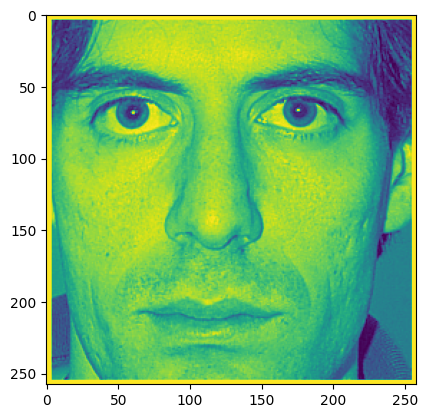

In [ ]:
plt.imshow(new_images1[39])

In [ ]:
x_train = []
for i in new_images1:
  x_train.append(i/255)

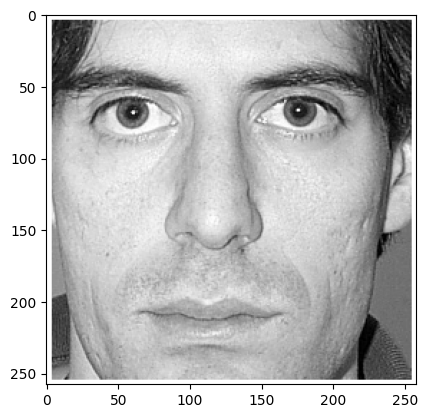

In [ ]:
plt.imshow(x_train[39],cmap = 'gray')

In [ ]:
y_train = []
for i in os.listdir(path):
  for j in os.listdir(os.path.join(path,i)):
    y_train.append(i)

In [ ]:
from keras.utils import to_categorical as tc

In [ ]:
y_train = tc(y_train)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf

In [ ]:
y_train[0].shape

(11,)

In [ ]:
model = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters = 24,kernel_size = 3, activation= 'relu', input_shape = (258,258,1)),
                              tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
                              tf.keras.layers.Conv2D(filters = 24,kernel_size = 3, activation = 'relu'),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Conv2D(filters = 24,kernel_size = 3, activation = 'relu'),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(36,activation = 'relu'),
                              tf.keras.layers.Dense(36,activation = 'relu'),
                              tf.keras.layers.Dense(36,activation = 'relu'),
                              tf.keras.layers.Dense(11,activation = 'softmax')
                            ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 24)      240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 24)      5208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 24)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 24)        5208      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 24)       0

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [1]:
history = model.fit(x_train,y_train,epochs = 10,batch_size = 64)

In [ ]:
x_train[0]

(258, 258)